Salary estimation

K-nearest neighbor



# importing file into colab


In [1]:
from google.colab import files
uploaded = files.upload()

Saving mysalary_predict_dataset.csv to mysalary_predict_dataset.csv


#importing libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

# read csv file

In [29]:
dataset = pd.read_csv('mysalary_predict_dataset.csv')

In [30]:
dataset

,S/N,age,salary,sex,date1,outcome
0,51,59,83000,0,59,83000
1,52,24,58000,0,24,58000
2,53,24,19000,0,24,19000
3,54,23,82000,0,23,82000
4,55,22,63000,0,22,63000
5,56,31,68000,0,31,68000
6,57,25,80000,0,25,80000
7,58,24,27000,0,24,27000
8,59,20,23000,0,20,23000
9,60,33,113000,0,33,113000


In [31]:
print (dataset.tail(5))

    S/N  age  salary  sex  date1  outcome
44   95   26   86000    0     26    86000
45   96   38   80000    0     38    80000
46   97   39   71000    0     39    71000
47   98   37   71000    0     37    71000
48   99   38   61000    0     38    61000


In [32]:
print (dataset.shape)

(49, 6)


#mapping salary data to binary value

In [28]:
income_set = set (dataset['salary'])
dataset['salary'] = dataset['salary'].map({'<=50000':0, '>50000':1}).astype(object)
print (dataset.tail(5))

    S/N  age salary  sex  date1  outcome
44   95   26    NaN    0     26    86000
45   96   38    NaN    0     38    80000
46   97   39    NaN    0     39    71000
47   98   37    NaN    0     37    71000
48   99   38    NaN    0     38    61000


#segregate the data

In [33]:
X = dataset.iloc [:, :-1].values
X

array([[    51,     59,  83000,      0,     59],
       [    52,     24,  58000,      0,     24],
       [    53,     24,  19000,      0,     24],
       [    54,     23,  82000,      0,     23],
       [    55,     22,  63000,      0,     22],
       [    56,     31,  68000,      0,     31],
       [    57,     25,  80000,      0,     25],
       [    58,     24,  27000,      0,     24],
       [    59,     20,  23000,      0,     20],
       [    60,     33, 113000,      0,     33],
       [    61,     32,  18000,      0,     32],
       [    62,     34, 112000,      1,     34],
       [    63,     18,  52000,      0,     18],
       [    64,     22,  27000,      0,     22],
       [    65,     28,  87000,      0,     28],
       [    66,     26,  17000,      0,     26],
       [    67,     30,  80000,      0,     30],
       [    68,     39,  42000,      0,     39],
       [    69,     20,  49000,      0,     20],
       [    70,     35,  88000,      0,     35],
       [    71,     

In [34]:
Y = dataset.iloc[:, -1].values
Y

array([ 83000,  58000,  19000,  82000,  63000,  68000,  80000,  27000,
        23000, 113000,  18000, 112000,  52000,  27000,  87000,  17000,
        80000,  42000,  49000,  88000,  62000, 118000,  55000,  85000,
        81000,  50000,  81000, 116000,  15000,  28000,  83000,  44000,
        25000, 123000,  73000,  37000,  88000,  59000,  86000, 149000,
        21000,  72000,  35000,  89000,  86000,  80000,  71000,  71000,
        61000])

#splitting dataset to train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.25, random_state = 0)

# feature scaling to reduce 'X'

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.fit_transform (x_test)
print (x_train)

[[ 0.22419609  0.07782102  1.57250853 -0.24253563  0.07782102]
 [ 1.63663143  1.14508078 -0.25792468 -0.24253563  1.14508078]
 [-1.45727457 -0.72262379 -1.65571004 -0.24253563 -0.72262379]
 [ 1.50211378  1.27848825  0.07488136 -0.24253563  1.27848825]
 [-0.38113335 -1.25625367 -0.65729192 -0.24253563 -1.25625367]
 [-0.58290983 -0.45580885 -1.72227125 -0.24253563 -0.45580885]
 [ 0.29145491 -0.45580885 -1.78883245 -0.24253563 -0.45580885]
 [-0.11209804 -0.72262379 -0.4576083  -0.24253563 -0.72262379]
 [-0.515651    0.07782102  0.37440679 -0.24253563  0.07782102]
 [ 1.16581965 -1.1228462   0.10816196 -0.24253563 -1.1228462 ]
 [-0.2466157   0.07782102 -0.22464408 -0.24253563  0.07782102]
 [ 1.23307848 -0.45580885 -1.12322038 -0.24253563 -0.45580885]
 [-1.05372161 -1.25625367 -1.52258762 -0.24253563 -1.25625367]
 [-0.71742748 -0.98943873 -1.38946521 -0.24253563 -0.98943873]
 [ 0.08967843  0.74485837 -0.62401132 -0.24253563  0.74485837]
 [-1.25549809  0.21122849 -0.02496045 -0.24253563  0.21

In [38]:
print (x_test)

[[ 0.34390941  0.07257819 -0.9002214  -0.42640143  0.07257819]
 [-1.76496906 -1.24834488  0.14201966 -0.42640143 -1.24834488]
 [ 0.090844   -1.24834488  0.67802935 -0.42640143 -1.24834488]
 [ 0.42826455  0.07257819  0.73758598 -0.42640143  0.07257819]
 [ 0.59697483  1.20479797 -0.98955635 -0.42640143  1.20479797]
 [ 1.01875052 -0.11612511  0.0229064  -0.42640143 -0.11612511]
 [ 0.76568511  1.20479797  0.43980282 -0.42640143  1.20479797]
 [ 1.27181594 -1.81445477 -1.10866961 -0.42640143 -1.81445477]
 [-1.51190364 -0.87093829 -0.92999971 -0.42640143 -0.87093829]
 [-1.25883823  0.63868808 -1.19800456 -0.42640143  0.63868808]
 [-1.17448309  1.01609467  1.60115714  2.34520788  1.01609467]
 [ 0.51261969  1.20479797 -0.42376834 -0.42640143  1.20479797]
 [ 0.68132997 -0.11612511  1.92871862  2.34520788 -0.11612511]]


#find the best k-value by drawing the graph

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [40]:
error=[]
for i in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'mean error')

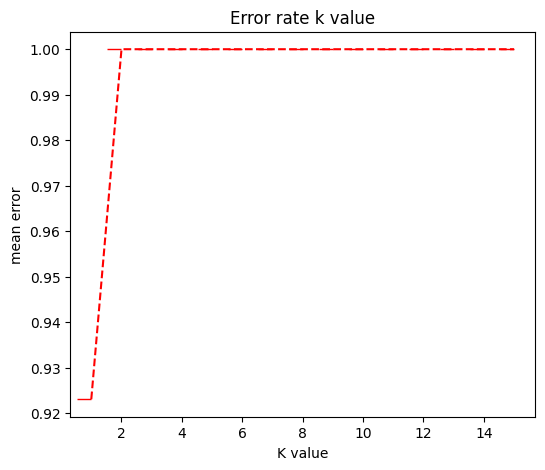

In [41]:
plt.figure (figsize=(6,5))
plt.plot (range (1,16), error , color='red', linestyle='dashed', marker=0, markersize=10)
plt.title ('Error rate k value')
plt.xlabel ('K value')
plt.ylabel ('mean error')

#train the model

In [42]:
from sklearn.linear_model import LogisticRegression
model = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#prediction for all test data

In [43]:
y_pred = model.predict(x_test)

#checking accuracy of prediction

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model: {0}%'.format (accuracy_score(y_test, y_pred) * 100))

Accuracy of the model: 7.6923076923076925%


#predicting the salary

In [ ]:
experience = int(input("Enter your experience"))
testScore = int(input("Enter test score"))
interview = int(input("Enter your interview score"))
newEmp = [[experience, testScore, interview]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print ("Employee might get salary above 50k")
else:
  print("Employee might not get salary above 50k")

Enter your experience3
Enter test score8
Enter your interview score7
[0]
Employee might not get salary above 50k
